In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
df=pd.read_csv("C:/Users/gheva/OneDrive/Desktop/heart_disease.csv")

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,fixed defect,4


## EDA ##

In [15]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

<Axes: >

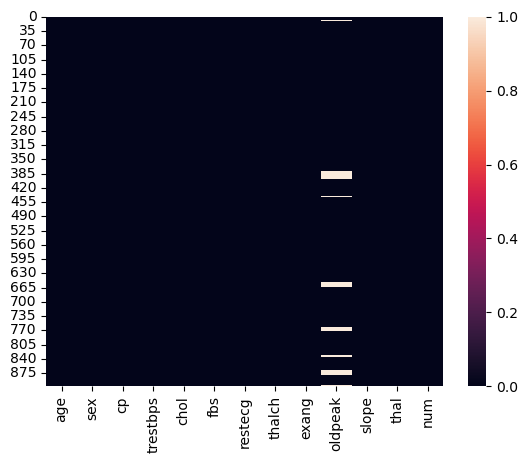

In [17]:
sns.heatmap(df.isna())

In [19]:
len(df)

908

In [21]:
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.828193832599119
0.0
0.0
0.0


In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


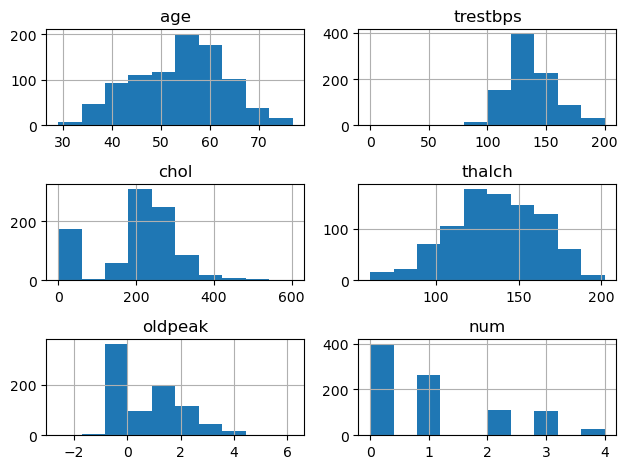

In [25]:
df.hist()
plt.tight_layout() 

<Axes: >

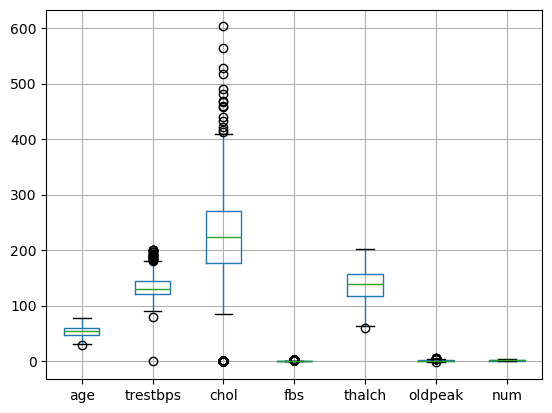

In [27]:
df.boxplot()

<Axes: xlabel='oldpeak'>

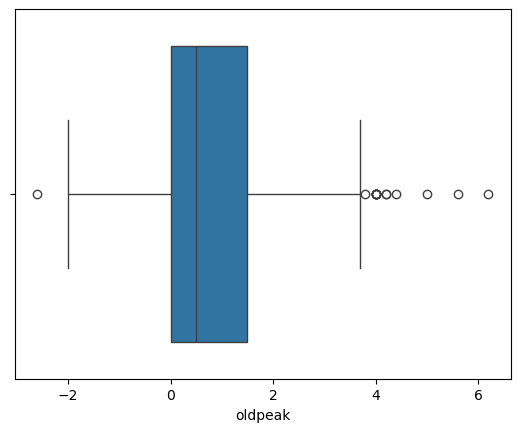

In [29]:
sns.boxplot(x = df['oldpeak'])

In [31]:
oldpeak_median = df['oldpeak'].median()
oldpeak_median

0.5

In [33]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

<Axes: xlabel='trestbps'>

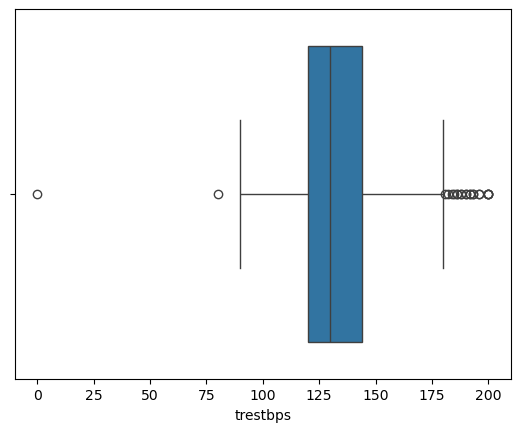

In [35]:
sns.boxplot(x = df['trestbps'])

In [37]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [41]:
outlier_detection(df,'trestbps')

(84.0, 180.0, 120.0, 144.0)

In [43]:
df[df['trestbps']>180.0].shape[0]

20

In [49]:

df.loc[df['trestbps']>180.0,'trestbps'] = 180

In [51]:

df.loc[df['trestbps']<84.0,'trestbps'] = 84.0

In [53]:
outlier_detection(df,'age')

(29.375, 78.375, 47.75, 60.0)

In [55]:
df.loc[df['age']<29,'age'] = 29

In [57]:
outlier_detection(df,'chol')

(36.875, 409.875, 176.75, 270.0)

In [59]:
df.loc[df['chol']>409,'chol'] = 409

In [61]:
df.loc[df['chol']<37,'chol'] = 37

In [63]:
outlier_detection(df,'thalch')

(61.0, 213.0, 118.0, 156.0)

In [65]:
df.loc[df['thalch']>213,'thalch'] = 213

In [67]:
df.loc[df['thalch']<61,'thalch'] = 61

<Axes: >

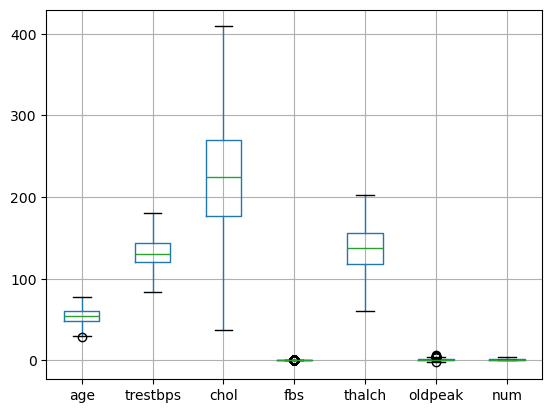

In [69]:
df.boxplot()

In [71]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,37,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,37,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


## Feature Engineering ##

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [75]:
cols_to_encode=['sex','cp','fbs','restecg','exang','slope','thal']

In [77]:
df[cols_to_encode]=df[cols_to_encode].astype(str)

In [79]:
encoder = LabelEncoder()

In [81]:
for col in cols_to_encode:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [83]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   0       125    37    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170    37    0        0     123      1      2.5   
906   56    1   2       144   208    1        2     105      2      NaN   
907   57    1   0       142   277    1        2     182      0      NaN   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3  

## Decision Tree Classification ##

In [85]:
df.iloc[:,1:13]

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,3,145,233,1,0,150,0,2.3,0,0,0
1,1,1,135,203,0,1,132,0,0.0,1,0,0
2,1,0,140,192,0,1,148,0,0.4,1,0,0
3,1,3,118,186,0,0,190,0,0.0,1,0,0
4,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1,0,125,37,0,1,120,0,1.5,2,0,4
904,1,0,166,170,0,2,120,1,3.0,1,1,4
905,1,2,170,37,0,0,123,1,2.5,0,2,4
906,1,2,144,208,1,2,105,2,NaN,0,1,4


In [87]:
x=df.iloc[:,1:12]
y=df['num']

In [89]:
x

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1,3,145,233,1,0,150,0,2.3,0,0
1,1,1,135,203,0,1,132,0,0.0,1,0
2,1,0,140,192,0,1,148,0,0.4,1,0
3,1,3,118,186,0,0,190,0,0.0,1,0
4,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
903,1,0,125,37,0,1,120,0,1.5,2,0
904,1,0,166,170,0,2,120,1,3.0,1,1
905,1,2,170,37,0,0,123,1,2.5,0,2
906,1,2,144,208,1,2,105,2,NaN,0,1


In [91]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [93]:
colnames=list(df.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [95]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [97]:
x_train

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
372,0,0,130,173,0,2,184,0,0.0,2,1
304,1,1,125,269,0,1,144,0,0.0,2,0
524,1,0,130,172,0,2,130,0,2.0,1,0
85,0,1,160,302,0,1,162,0,0.4,2,1
530,0,1,120,279,0,1,150,0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
835,1,3,142,200,1,2,100,0,1.5,0,2
192,1,2,160,37,0,0,114,0,1.6,1,1
629,1,3,140,295,0,2,136,0,0.0,1,1
559,1,0,140,37,0,2,117,1,1.0,1,1


In [99]:
x_train.shape

(726, 11)

In [101]:
y_train

372    0
304    0
524    1
85     0
530    1
      ..
835    3
192    0
629    1
559    1
684    2
Name: num, Length: 726, dtype: int64

In [103]:
y_test

251    0
732    2
497    1
887    4
144    0
      ..
899    4
687    2
635    1
2      0
402    1
Name: num, Length: 182, dtype: int64

In [105]:
y_test.shape

(182,)

In [107]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 1.917\nsamples = 726\nvalue = [323.0, 210.0, 87.0, 84.0, 22.0]'),
 Text(0.25, 0.5, 'x[8] <= 1.75\nentropy = 2.08\nsamples = 388\nvalue = [80.0, 155.0, 73.0, 62.0, 18.0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.942\nsamples = 248\nvalue = [71, 106, 38, 26, 7]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.077\nsamples = 140\nvalue = [9, 49, 35, 36, 11]'),
 Text(0.75, 0.5, 'x[8] <= 2.45\nentropy = 1.291\nsamples = 338\nvalue = [243.0, 55.0, 14.0, 22.0, 4.0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.136\nsamples = 318\nvalue = [239.0, 49.0, 11.0, 19.0, 0.0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.271\nsamples = 20\nvalue = [4, 6, 3, 3, 4]')]

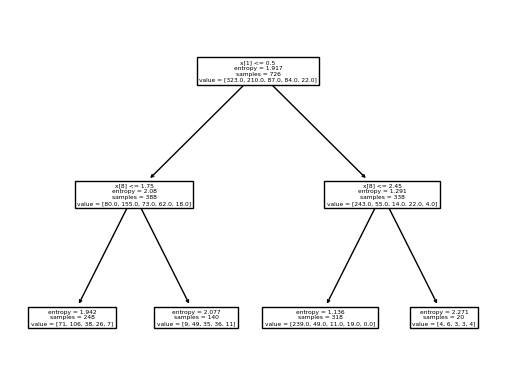

In [109]:
tree.plot_tree(model)

In [111]:
y_train.value_counts()

num
0    323
1    210
2     87
3     84
4     22
Name: count, dtype: int64

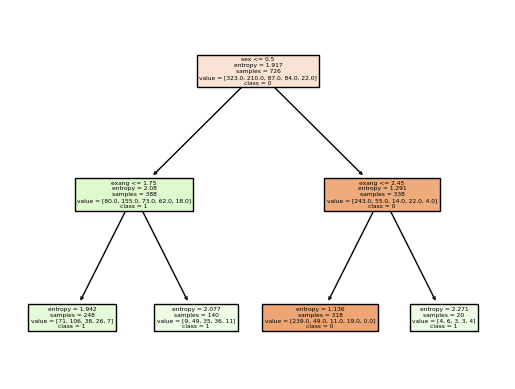

In [113]:
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] 
cn=['0','1','2','3','4'] 
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [115]:

preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    108
0     74
Name: count, dtype: int64

In [117]:
model.feature_importances_

array([0.        , 0.69702623, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.30297377, 0.        ,
       0.        ])

In [119]:
preds

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [123]:
pd.crosstab(y_test,preds)

col_0,0,1
num,,
0,53,23
1,13,42
2,5,17
3,2,21
4,1,5


In [125]:
# Accuracy
np.mean(preds==y_test)

0.521978021978022

## Hyperparameter Tuning##

In [127]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=0)

In [129]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [133]:

pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.5054945054945055

## Interview Questions##

1. What are some common hyperparameters of decision tree models, and how do they affect the models performance?

Ans:1) MAX Depth - It limits tree depth, too high-overfitting,too low -underfitting
2)Min samples split-Min samples to split a node ,higher-less overfitting
3) min samples leaf- Min samples per leaf , higher-smoother,less-overfitting
4) Criterion- determines the function used to measures the quality of a split
5) Min impurity decreases- Specifies the minimum reduction in impurity required for a split.


2. What is the difference between the Label encoding and One-hot encoding?

In [ ]:
Ans:Label encoding assigns a unique numerical value to each category.It is efficient but can introduce 
ordinal relationships where none exist.
      One hot encoding creats binary columns for each category.It prevents ordinal issues but increases dimensionality,